In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

(42000, 785)

In [4]:
X_train_main = df.drop('label', axis=1)
Y_train_main = df.label

In [5]:
X_train = X_train_main.to_numpy()
Y_train = Y_train_main.to_numpy()

In [8]:
X_train=X_train.reshape(42000,28,28)
X_train.shape

(42000, 28, 28)

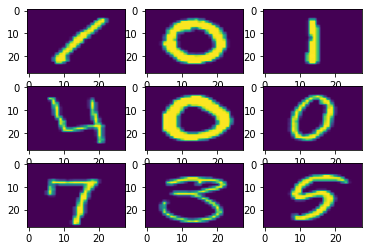

In [9]:
fig, ax = plt.subplots(3, 3)
k = 0

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

In [10]:
import tensorflow
from tensorflow import keras

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5),activation='relu',input_shape=[28,28,1]),
    keras.layers.AveragePooling2D(strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5),activation='relu'),
    keras.layers.AveragePooling2D(strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(84,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [14]:
model_hist=model.fit(X_train,Y_train,validation_split=0.15,epochs=100, 
          callbacks=keras.callbacks.EarlyStopping(patience=5))

Epoch 1/100
1116/1116 [==============================] - 50s 39ms/step - loss: 0.7842 - accuracy: 0.8214 - val_loss: 0.1114 - val_accuracy: 0.9657
Epoch 2/100
1116/1116 [==============================] - 42s 38ms/step - loss: 0.1574 - accuracy: 0.9561 - val_loss: 0.0761 - val_accuracy: 0.9776
Epoch 3/100
1116/1116 [==============================] - 43s 39ms/step - loss: 0.1179 - accuracy: 0.9665 - val_loss: 0.0791 - val_accuracy: 0.9783
Epoch 4/100
1116/1116 [==============================] - 46s 41ms/step - loss: 0.0918 - accuracy: 0.9741 - val_loss: 0.0689 - val_accuracy: 0.9805
Epoch 5/100
1116/1116 [==============================] - 44s 39ms/step - loss: 0.0821 - accuracy: 0.9768 - val_loss: 0.0638 - val_accuracy: 0.9837
Epoch 6/100
1116/1116 [==============================] - 42s 38ms/step - loss: 0.0750 - accuracy: 0.9789 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 7/100
1116/1116 [==============================] - 42s 38ms/step - loss: 0.0613 - accuracy: 0.9823 - val_loss: 0

In [49]:
X_test = pd.read_csv('test.csv')
X_test = X_test.to_numpy()
X_test.shape
X_test = X_test.reshape(28000,28,28)

In [50]:
Y_pred = model.predict(X_test)

875/875 [==============================] - 16s 14ms/step


In [51]:
np.argmax(Y_pred[0:10],axis=1)

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3], dtype=int64)

In [18]:
output = pd.DataFrame({'ImageId':list(range(1,28001)),'Label':np.argmax(Y_pred,axis=1)})
output.head()

,ImageId,Label
0,1,1
1,2,8
2,3,1
3,4,8
4,5,8


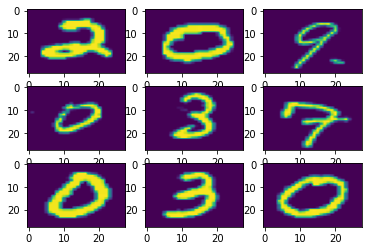

In [45]:
fig, ax = plt.subplots(3, 3)
k = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_test[k], aspect='auto')
        k += 1

plt.show()